<a href="https://colab.research.google.com/github/AdvancedUno/HuBMAP-HPA---Hacking-the-Human-Body-Kaggle-/blob/main/kaggle_data_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import os 

In [35]:
path = '/content/drive/MyDrive/DeepLearning/train_annotations' # 폴더 경로
os.chdir(path) # 해당 폴더로 이동
files = os.listdir(path) # 해당 폴더에 있는 파일 이름을 

In [ ]:
i  = 0
for file in files:
      newfile = file.replace("tiff", "png")
      print(newfile)
      
      i+=1
      f = cv2.imread(file)
      #img = cv2.resize(f, dsize=(640, 640), interpolation=cv2.INTER_CUBIC)
      cv2.imwrite("/content/drive/MyDrive/DeepLearning/training/"+newfile, img)

print(i)

In [12]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"advanceduno","key":"146e98f411f41bb890e38a242fba6082"}'}

In [13]:
ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Sep 13 04:21 kaggle.json


In [14]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [18]:
cd DeepLearning

/content/drive/MyDrive/DeepLearning


In [19]:
!kaggle competitions download -c hubmap-organ-segmentation

100% 5.76G/5.78G [00:33<00:00, 204MB/s]
100% 5.78G/5.78G [00:33<00:00, 185MB/s]


In [15]:
ls

drive/  hubmap-organ-segmentation.zip  sample_data/


In [20]:
!unzip -qq "/content/drive/MyDrive/DeepLearning/hubmap-organ-segmentation.zip"

replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
y


drive/  hubmap-organ-segmentation.zip  sample_data/


In [21]:
import pandas as pd
import numpy as np

import os
import json
from tqdm.auto import tqdm
import gc

from skimage import io
from skimage.transform import resize

In [22]:
def rle2mask(mask_rle: str, shape=None, label: int = 0):
    """
    mask_rle: run-length as string formatted (start length)
    shape: (height,width) of array to return
    Returns numpy array, 1 - mask, 0 - background

    """
    rle = np.array(list(map(int, mask_rle.split())))
    labels = np.zeros(shape).flatten()
    
    for start, end in zip(rle[::2], rle[1::2]):
        labels[start:start+end] = label

    return labels.reshape(shape).T  # Needed to align to RLE direction

In [23]:
df_train = pd.read_csv("/content/drive/MyDrive/DeepLearning/train.csv")

In [24]:
organs = df_train['organ'].unique()

In [25]:
organ_annotations = {}

for i, organ in enumerate(organs):
    organ_annotations[organ] = i+1
    
organ_annotations

{'prostate': 1, 'spleen': 2, 'lung': 3, 'kidney': 4, 'largeintestine': 5}

[0. 1.]


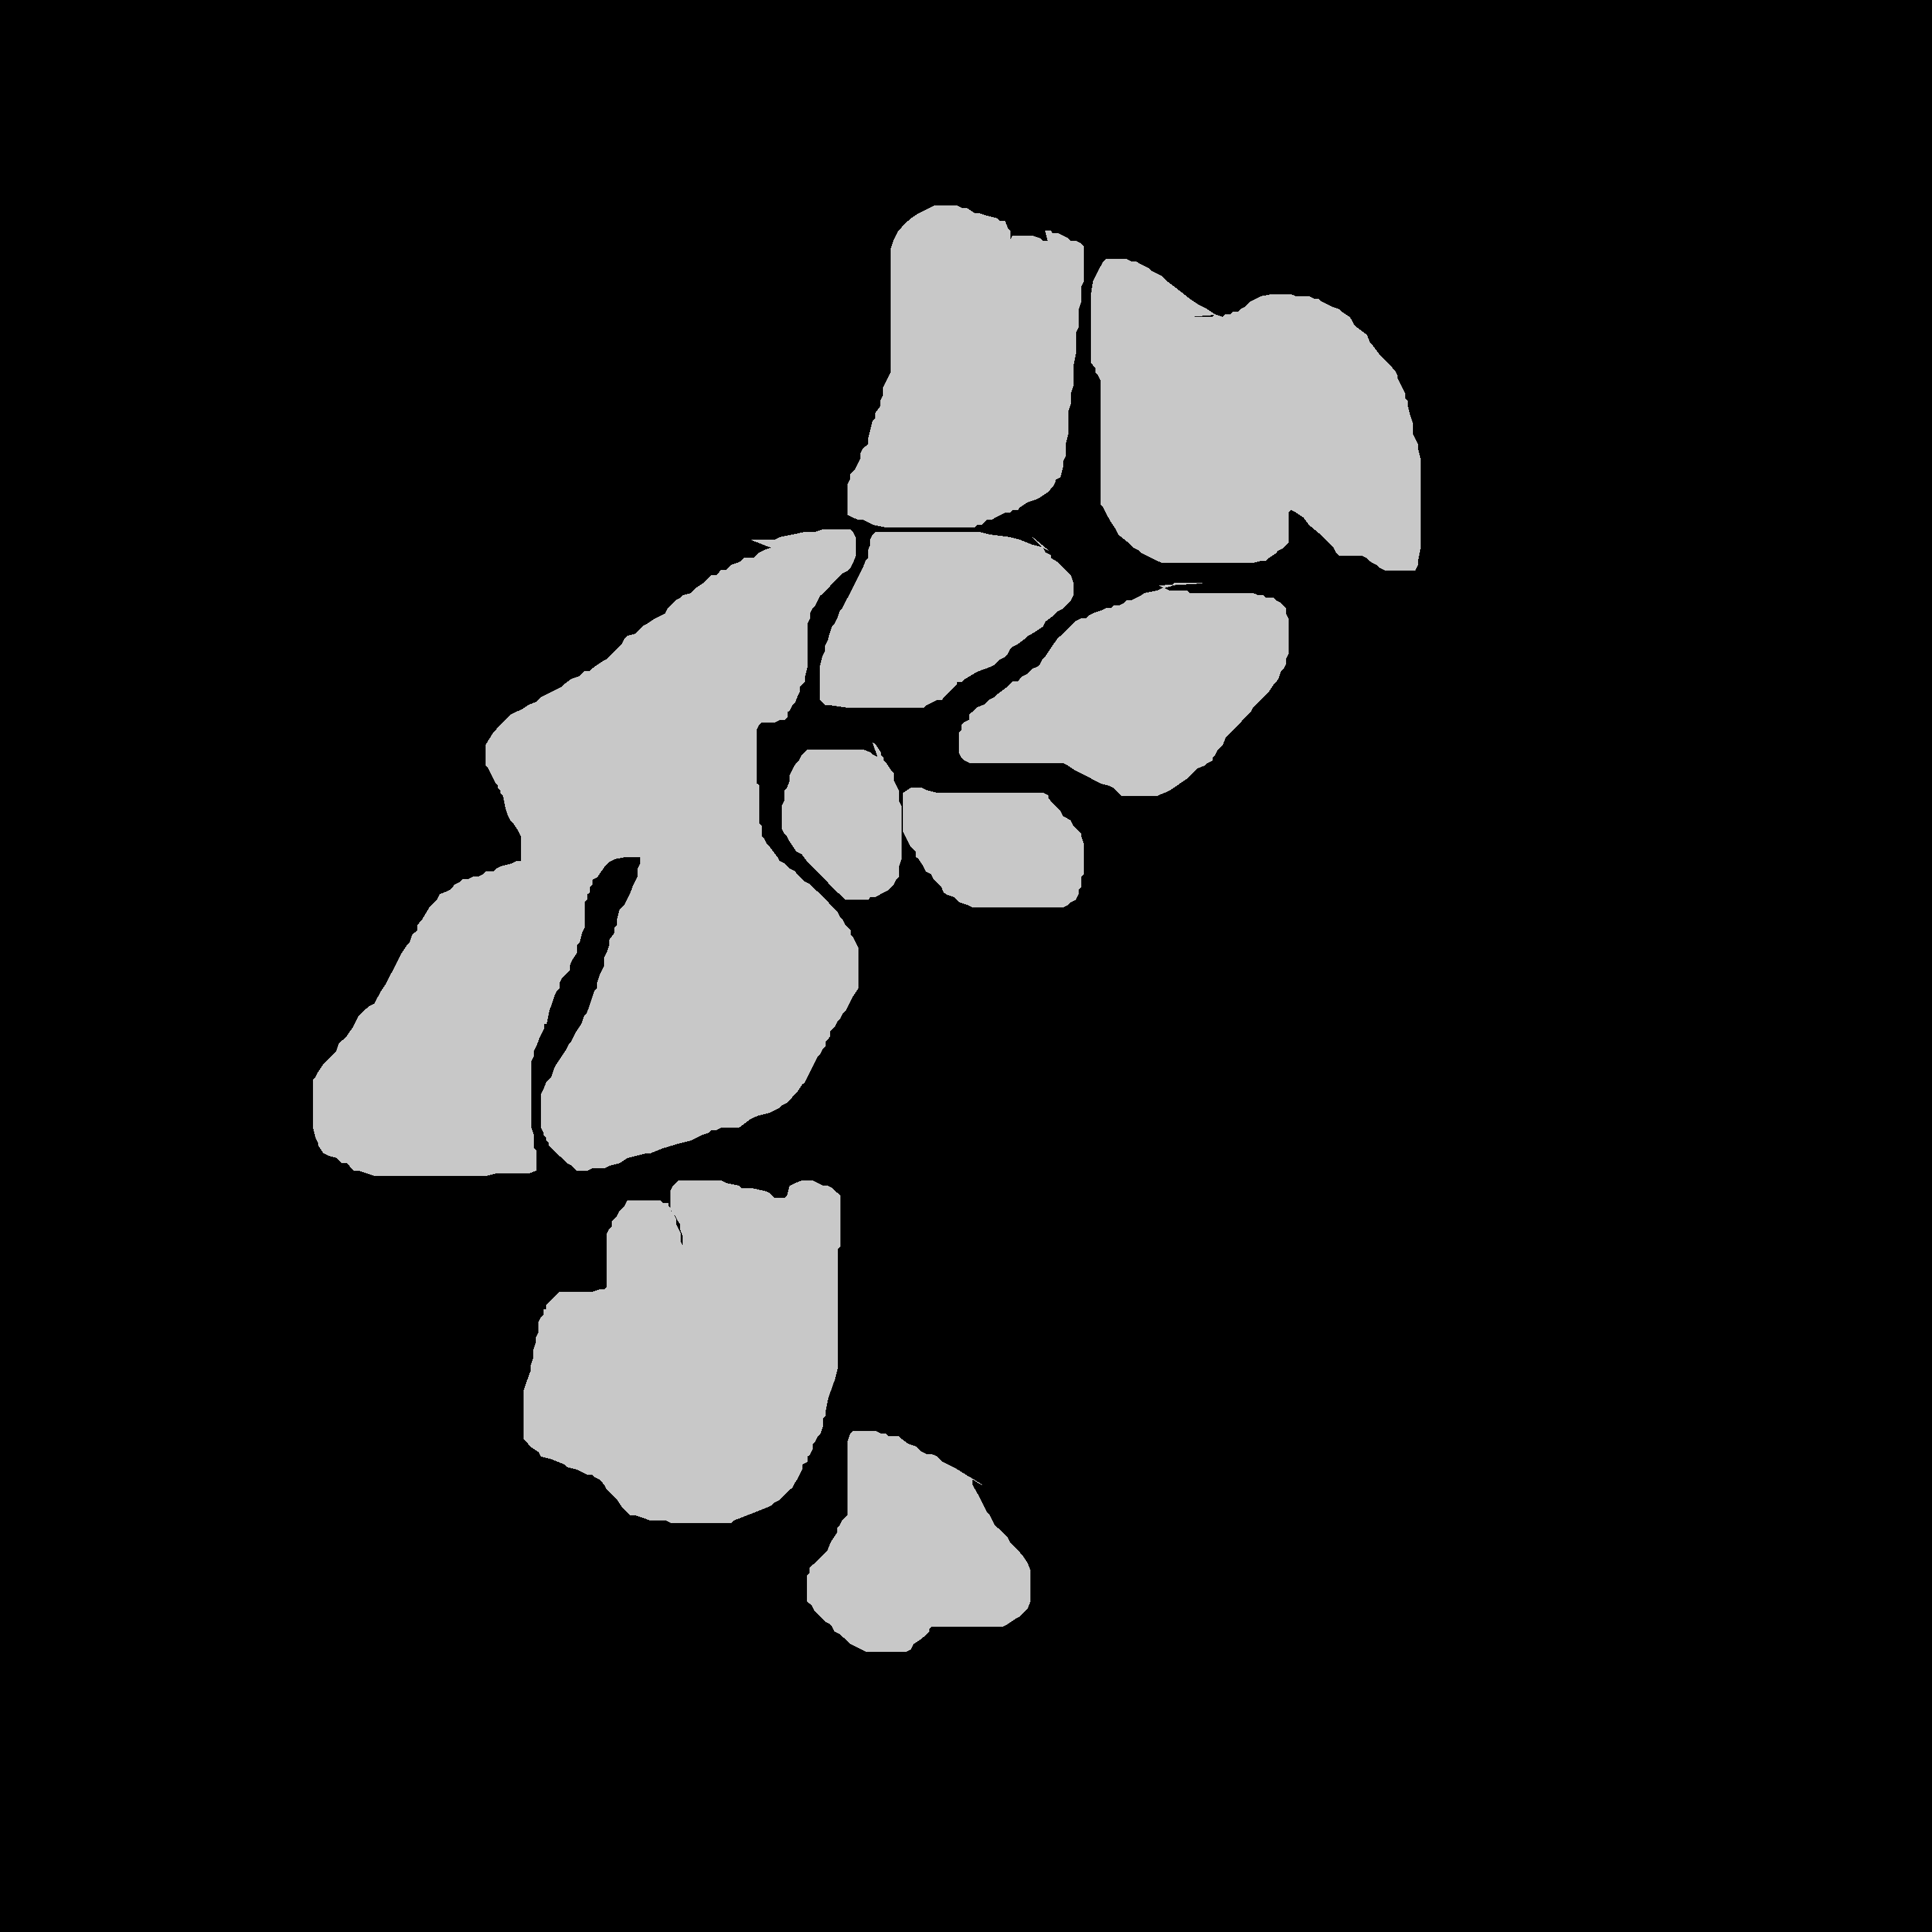

[0. 1.]


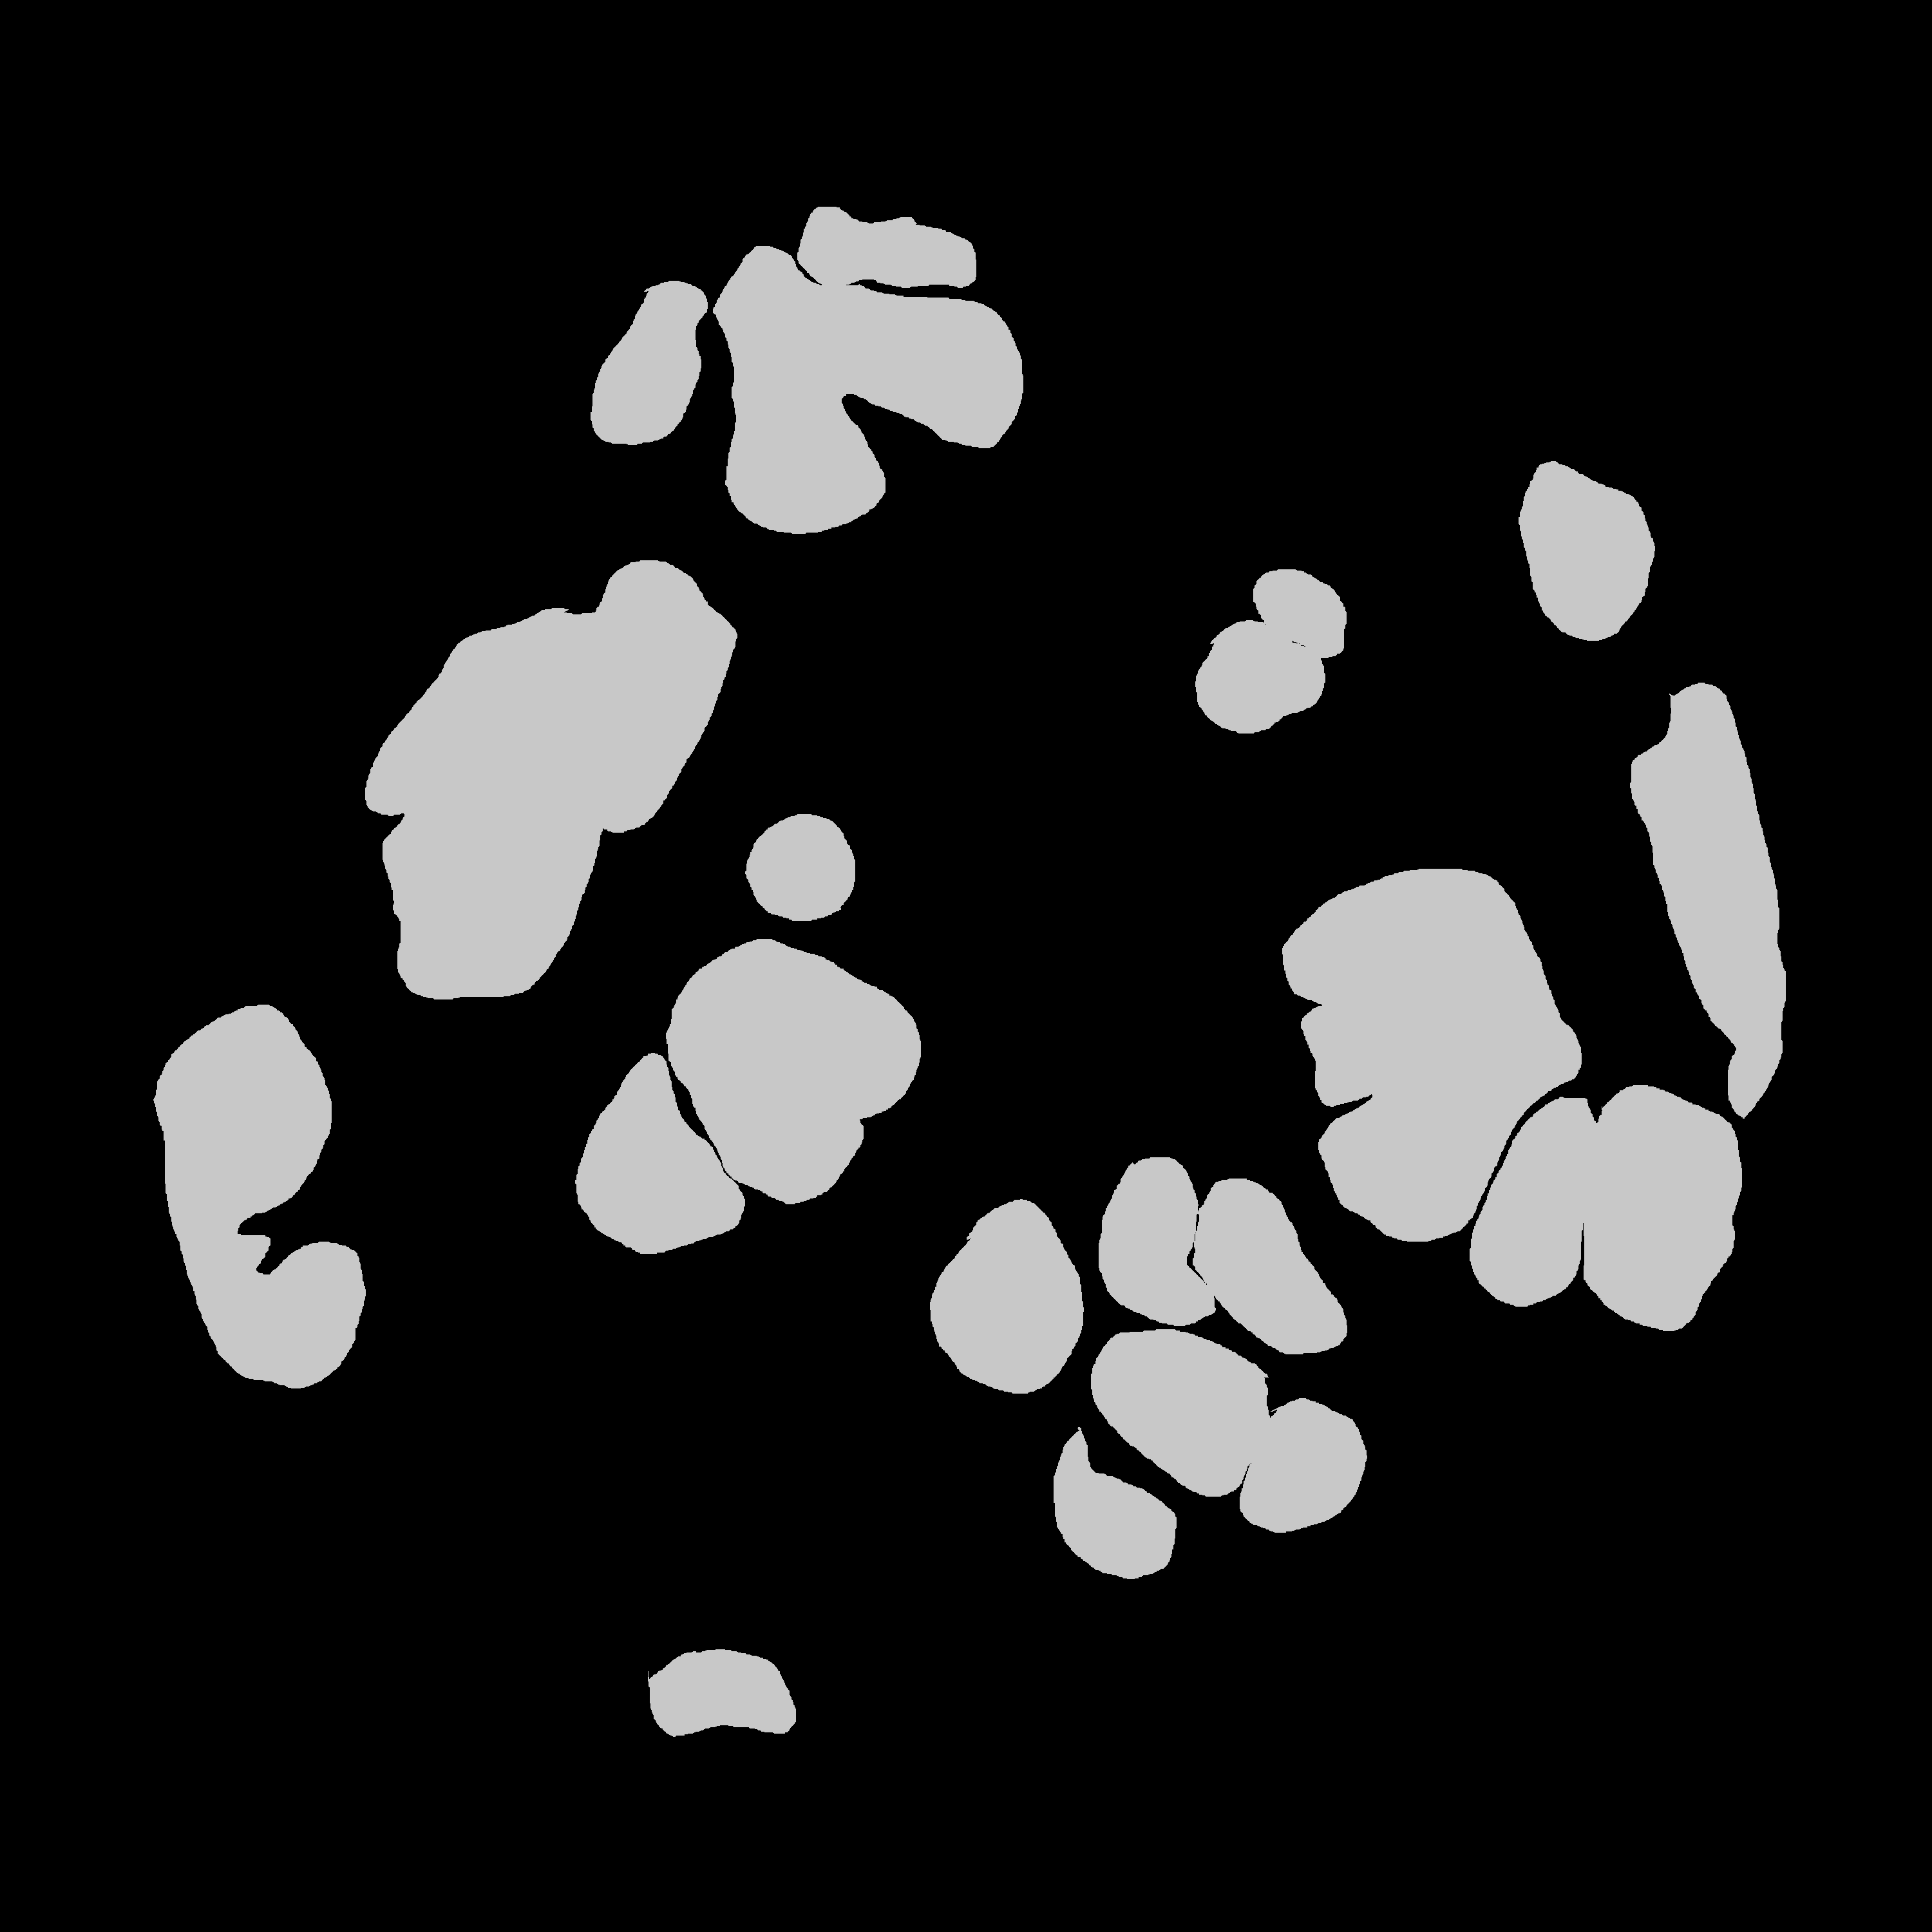

In [ ]:
from google.colab.patches import cv2_imshow
for file in files:
      newfile = file.replace(".json", "")
      savefile = file.replace("json", "png")
      #print(newfile)
      #print(df_train)
      #print("asfd")
      #print(newfile)
      newfile = int(newfile)
      
      rle = df_train[df_train['id'] == newfile]['rle'].values[0]
      height = df_train[df_train['id'] == newfile]['img_height'].values[0]
      width = df_train[df_train['id'] == newfile]['img_width'].values[0]
      organ = df_train[df_train['id'] == newfile]['organ'].values[0]
      
      mask = rle2mask(rle, shape=(height, width), label=organ_annotations[organ])
      #mask = cv2.resize(mask, dsize=(640, 640), interpolation=cv2.INTER_NEAREST)
      #mask = mask.astype(np.int8)
      #print(mask)
     
      A =  np.unique(mask.reshape(-1), axis=0) 
      print(A)
      cv2.imwrite("/content/drive/MyDrive/DeepLearning/masks/"+savefile, mask)
      #break
      #cv2.imshow("a", mask)
      #print(mask.shape)
      mask = mask * 200
      cv2_imshow(mask)

      #cv2.waitKey()

      #cv2.destroyAllWindows()
      # break

